In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1. **Para el modelo perceptrón multicapa de *N* neuronas de entrada, *M* neuronas de salida, *P* capas ocultas y *Q* neuronas para cada oculta, demuestre que si para todas las neuronas de la capa oculta y las neuronas de salida la función de activación es la función lineal, el modelo es lineal para las entradas.** \\
Si **X** es el vector de entradas, y F_Q(**X**)=**X** , y F_N(**X**)=**X** (es lineal) y F_i(...F_Q(F_M(**X**)))=X, entonces F_N(**X**)=**X** para que **X** sea la entrada de F_i(...F_Q(F_M(**X**)))=X



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/Shareddrives/redes/misterious_data_1.txt",delimiter='\t',header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,1,0.469168,0.178952,0.255712,0.744816,1.246886,1.254866,0.804426,0.412733,0.258974,...,0.993407,-0.592111,-1.301687,-1.066966,-0.722061,-0.622120,-0.396476,0.133550,0.594973,0.691093
1,1,0.184388,0.194901,0.386090,0.796802,1.066347,0.799498,0.074394,-0.544738,-0.580456,...,-0.003908,-0.167604,-0.428945,-0.725686,-1.053406,-1.276862,-1.183251,-0.693138,0.016754,0.573650
2,1,-0.173341,0.145202,-0.304082,-1.414886,-2.213521,-1.913048,-0.831063,-0.007732,0.002380,...,1.902134,3.393694,3.131702,1.403325,-0.030289,-0.271096,-0.198293,-0.751224,-1.350148,-0.882644
3,1,-0.268590,0.599522,1.307578,1.167486,0.251935,-0.585627,-0.553452,0.185590,0.613321,...,-1.296833,-0.876860,-1.043880,-1.516590,-1.531095,-1.016308,-0.483549,-0.267818,-0.367672,-0.666145
4,1,2.525379,2.852672,2.172197,0.637552,-0.600348,-0.702175,-0.074887,0.279032,-0.025487,...,-0.890283,-0.624969,-0.753863,-0.854603,-0.736751,-0.614611,-0.587151,-0.409589,0.087732,0.646462


In [ ]:
y=df[0]
df.pop(0)

0      1
1      1
2      1
3      1
4      1
      ..
523    2
524    2
525    2
526    2
527    2
Name: 0, Length: 528, dtype: int64

## Building Perceptron

In [ ]:
def step_func(x):
    return np.where(x > 1 , 1, -1)

In [ ]:
def sign_func(x):
    return np.sign(x)

In [ ]:
def indicator_func(y,y_test):
    return np.where(y*y_test<1 , 1, 0)

In [ ]:
def perceptron_predict(X,y_true,weight, bias):
    weighted_sum = np.dot(X, weight) + bias
    y_predict=sign_func(weighted_sum)
    accuracy=np.equal(y_predict, y_true).mean()
    return(y_predict,accuracy)

In [ ]:
#for stochastic gradient descent
def perceptron_fit_sgd(X, y, lr, epochs):  # X input data, y labels , lr=learning rate, epochs=iterations 
        errors=[]
        m, n = X.shape
        weights = np.random.rand(n)
        bias=np.random.rand()
        y_true = np.where(y == 1 , 1, -1)
        # learn weights 

        for epoch in range(epochs):
            for index in range(len(X)):
                x_i=X.iloc[index, :]
                weighted_sum = np.dot(weights, x_i) + bias
                y_predicted = sign_func(weighted_sum)

                # Update using stochastic gradient descent

                update = lr * (y_true[index] - y_predicted) 
                weights += update * x_i
                bias += update

            _, accuracy = perceptron_predict(X, y_true, weights,bias)
            err= 1- accuracy
            errors.append(err)

        return (weights,errors, bias)

In [ ]:
# for batch

def perceptron_fit_batch(X, y, lr, epochs):  # X input data, y labels , lr=learning rate, epochs=iterations 

        errors=[]
        m, n = X.shape
        weights = np.random.rand(n)
        bias=np.random.rand()
        y_true = np.where(y == 1 , 1, -1)
        # learn weights  

        for epoch in range(epochs):
            update_bias =0
            update_weight = 0

            for index in range(len(X)):
                x_i=X.iloc[index, :]
                weighted_sum = np.dot(weights, x_i) + bias
                y_predicted = sign_func(weighted_sum)

                # Learning rule using stochastic gradient descent
                updt_weight = lr * (y_true[index] - y_predicted) * x_i
                updt_bias= lr * (y_true[index] - y_predicted)

                update_bias+=updt_bias
                update_weight += updt_weight
              
            weights += update_weight #updating weights at the end 
            bias += update_bias
            _, accuracy = perceptron_predict(X, y_true, weights,bias)
            err= 1- accuracy
            
            errors.append(err)
            
        return (weights,errors, bias)

In [ ]:
# for mini batch

def perceptron_fit_minibatch(X, y, lr, epochs, batch_size): #Batches  # X input data, y labels , lr=learning rate, epochs=iterations 
        errors=[]
        m, n = X.shape
        weights = np.random.rand(n)
        bias=np.random.rand()
        y_true = np.where(y == 1 , 1, -1)
        batches = round(len(X)/batch_size)
        b=0
        sections=[]
        sections_y=[]
        for b in range(batches):
          array = df[b*batch_size:batch_size*(b+1)]
          array_y=y_true[b*batch_size:batch_size*(b+1)]
          sections.append(array)
          sections_y.append(array_y)

        # learn weights  
        for epoch in range(epochs): 
          for i in range(len(sections)):
            update_bias =0
            update_weight = 0
            for j in range(len(sections[i])):
              x_i=sections[i].iloc[j, :]
              y_true_2=sections_y[i][j]
              weighted_sum = np.dot(weights, x_i) + bias
              y_predicted = sign_func(weighted_sum)

              # Update using stochastic gradient descent
              updt_weight = lr * (y_true_2 - y_predicted) * x_i
              updt_bias= lr * (y_true_2 - y_predicted)

              update_bias+=updt_bias
              update_weight += updt_weight
            #updating weights at the end of each batch_size
            weights += update_weight 
            bias += update_bias
          y_trial, accuracy = perceptron_predict(X, y_true, weights,bias)
          err= 1- accuracy  
          errors.append(err)

        return (weights,errors, bias)

## Cross Validation - Train Test Split

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=666)

train_index, test_index = list(kf.split(df))[0]
X_train0, X_test0 = df.iloc[train_index, :], df.iloc[test_index, :]
y_train0, y_test0 = y[train_index], y[test_index]

In [ ]:
train_index, test_index = list(kf.split(df))[1]
X_train1, X_test1 = df.iloc[train_index, :], df.iloc[test_index, :]
y_train1, y_test1 = y[train_index], y[test_index]

In [ ]:
train_index, test_index = list(kf.split(df))[2]
X_train2, X_test2 = df.iloc[train_index, :], df.iloc[test_index, :]
y_train2, y_test2 = y[train_index], y[test_index]

In [ ]:
train_index, test_index = list(kf.split(df))[3]
X_train3, X_test3 = df.iloc[train_index, :], df.iloc[test_index, :]
y_train3, y_test3 = y[train_index], y[test_index]

In [ ]:
train_index, test_index = list(kf.split(df))[4]
X_train4, X_test4 = df.iloc[train_index, :], df.iloc[test_index, :]
y_train4, y_test4 = y[train_index], y[test_index]

In [ ]:
def reset_indexes(xtrain, ytrain, xtest, ytest):
  xtrain.reset_index(drop=True, inplace=True)
  ytrain.reset_index(drop=True, inplace=True)
  xtest.reset_index(drop=True, inplace=True)
  ytest.reset_index(drop=True, inplace=True)

  ytest = np.where(ytest ==1 , 1, -1)

  return(ytest)


In [ ]:
y_test0= reset_indexes(X_train0, y_train0, X_test0, y_test0)
y_test1= reset_indexes(X_train1, y_train1, X_test1, y_test1)
y_test2=reset_indexes(X_train2, y_train2, X_test2, y_test2)
y_test3=reset_indexes(X_train3, y_train3, X_test3, y_test3)
y_test4=reset_indexes(X_train4, y_train4, X_test4, y_test4)

#  Implementation of Perceptron Models & Error per Epoch Graphs

SGD

In [ ]:
# SGD model fitting
weights00, error_perceptron00, bias00 = perceptron_fit_sgd(X_train0,y_train0,0.001,100)
weights01, error_perceptron01, bias01 = perceptron_fit_sgd(X_train1,y_train1,0.001,100)
weights02, error_perceptron02, bias02 = perceptron_fit_sgd(X_train2,y_train2,0.001,100)
weights03, error_perceptron03, bias03 = perceptron_fit_sgd(X_train3,y_train3,0.001,100)
weights04, error_perceptron04, bias04 = perceptron_fit_sgd(X_train4,y_train4,0.001,100)

In [ ]:
#SGD prediction
y_predict00,accuracy00=perceptron_predict(X_test0, y_test0, weights00, bias00) #X,y_true,weight
y_predict01,accuracy01=perceptron_predict(X_test1, y_test1, weights01, bias01) #X,y_true,weight
y_predict02,accuracy02=perceptron_predict(X_test2, y_test2, weights02, bias02) #X,y_true,weight
y_predict03,accuracy03=perceptron_predict(X_test3, y_test3, weights03, bias03) #X,y_true,weight
y_predict04,accuracy04=perceptron_predict(X_test4, y_test4, weights04, bias04) #X,y_true,weight
print("Model accuracy Kfold 0: ", accuracy00)
print("Model accuracy Kfold 1: ", accuracy01)
print("Model accuracy Kfold 2: ", accuracy02)
print("Model accuracy Kfold 3: ", accuracy03)
print("Model accuracy Kfold 4: ", accuracy04)


Model accuracy Kfold 0:  0.7264150943396226
Model accuracy Kfold 1:  0.8113207547169812
Model accuracy Kfold 2:  0.7547169811320755
Model accuracy Kfold 3:  0.7142857142857143
Model accuracy Kfold 4:  0.7142857142857143


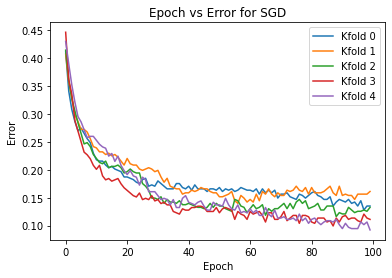

In [ ]:
ep=list(range(100))
plt.plot(ep,error_perceptron00)
plt.plot(ep,error_perceptron01)
plt.plot(ep,error_perceptron02)
plt.plot(ep,error_perceptron03)
plt.plot(ep,error_perceptron04)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend(['Kfold 0', 'Kfold 1', 'Kfold 2', 'Kfold 3', 'Kfold 4'])
plt.title("Epoch vs Error for SGD")
plt.show()

In [ ]:
list_kfold= [accuracy00, accuracy01, accuracy02, accuracy03, accuracy04]
plt.plot(list(range(5)), list_kfold)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy in each fold')


Batch

In [ ]:
# Batch model fitting
weights00, error_perceptron00, bias00 = perceptron_fit_batch(X_train0,y_train0,0.001,100)
weights01, error_perceptron01, bias01 = perceptron_fit_batch(X_train1,y_train1,0.001,100)
weights02, error_perceptron02, bias02 = perceptron_fit_batch(X_train2,y_train2,0.001,100)
weights03, error_perceptron03, bias03 = perceptron_fit_batch(X_train3,y_train3,0.001,100)
weights04, error_perceptron04, bias04 = perceptron_fit_batch(X_train4,y_train4,0.001,100)

In [ ]:
#Batch  prediction

y_predict00,accuracy00=perceptron_predict(X_test0, y_test0, weights00, bias00) #X,y_true,weight
y_predict01,accuracy01=perceptron_predict(X_test1, y_test1, weights01, bias01) #X,y_true,weight
y_predict02,accuracy02=perceptron_predict(X_test2, y_test2, weights02, bias02) #X,y_true,weight
y_predict03,accuracy03=perceptron_predict(X_test3, y_test3, weights03, bias03) #X,y_true,weight
y_predict04,accuracy04=perceptron_predict(X_test4, y_test4, weights04, bias04) #X,y_true,weight
print("Model accuracy Kfold 0: ", accuracy00)
print("Model accuracy Kfold 1: ", accuracy01)
print("Model accuracy Kfold 2: ", accuracy02)
print("Model accuracy Kfold 3: ", accuracy03)
print("Model accuracy Kfold 4: ", accuracy04)


Model accuracy Kfold 0:  0.7452830188679245
Model accuracy Kfold 1:  0.7924528301886793
Model accuracy Kfold 2:  0.7924528301886793
Model accuracy Kfold 3:  0.7523809523809524
Model accuracy Kfold 4:  0.7333333333333333


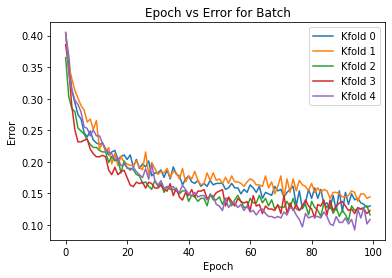

In [ ]:
ep=list(range(100))
plt.plot(ep,error_perceptron00)
plt.plot(ep,error_perceptron01)
plt.plot(ep,error_perceptron02)
plt.plot(ep,error_perceptron03)
plt.plot(ep,error_perceptron04)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend(['Kfold 0', 'Kfold 1', 'Kfold 2', 'Kfold 3', 'Kfold 4'])
plt.title("Epoch vs Error for Batch")
plt.show()

Text(0.5, 1.0, 'Accuracy in each fold')

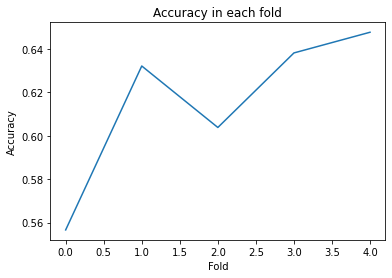

In [ ]:
list_kfold= [accuracy00, accuracy01, accuracy02, accuracy03, accuracy04]
plt.plot(list(range(5)), list_kfold)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy in each fold')


Mini Batch

In [ ]:
# Mini Batch model fitting

weights00, error_perceptron00, bias00 = perceptron_fit_minibatch(X_train0,y_train0,0.01,100, 100)
weights01, error_perceptron01, bias01 = perceptron_fit_minibatch(X_train1,y_train1,0.01,100, 100)
weights02, error_perceptron02, bias02 = perceptron_fit_minibatch(X_train2,y_train2,0.01,100, 100)
weights03, error_perceptron03, bias03 = perceptron_fit_minibatch(X_train3,y_train3,0.01,100, 100)
weights04, error_perceptron04, bias04 = perceptron_fit_minibatch(X_train4,y_train4,0.01,100, 100)

In [ ]:
# Mini Batch  prediction

y_predict00,accuracy00=perceptron_predict(X_test0, y_test0, weights00, bias00) #X,y_true,weight
y_predict01,accuracy01=perceptron_predict(X_test1, y_test1, weights01, bias01) #X,y_true,weight
y_predict02,accuracy02=perceptron_predict(X_test2, y_test2, weights02, bias02) #X,y_true,weight
y_predict03,accuracy03=perceptron_predict(X_test3, y_test3, weights03, bias03) #X,y_true,weight
y_predict04,accuracy04=perceptron_predict(X_test4, y_test4, weights04, bias04) #X,y_true,weight
print("Model accuracy Kfold 0: ", accuracy00)
print("Model accuracy Kfold 1: ", accuracy01)
print("Model accuracy Kfold 2: ", accuracy02)
print("Model accuracy Kfold 3: ", accuracy03)
print("Model accuracy Kfold 4: ", accuracy04)

Model accuracy Kfold 0:  0.5566037735849056
Model accuracy Kfold 1:  0.6320754716981132
Model accuracy Kfold 2:  0.6037735849056604
Model accuracy Kfold 3:  0.638095238095238
Model accuracy Kfold 4:  0.6476190476190476


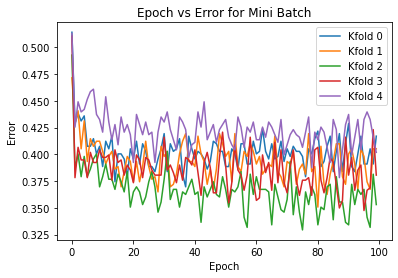

In [ ]:
ep=list(range(100))
plt.plot(ep,error_perceptron00)
plt.plot(ep,error_perceptron01)
plt.plot(ep,error_perceptron02)
plt.plot(ep,error_perceptron03)
plt.plot(ep,error_perceptron04)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend(['Kfold 0', 'Kfold 1', 'Kfold 2', 'Kfold 3', 'Kfold 4'])
plt.title("Epoch vs Error for Mini Batch")
plt.show()

In [ ]:
list_kfold= [accuracy00, accuracy01, accuracy02, accuracy03, accuracy04]
plt.plot(list(range(5)), list_kfold)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy in each fold')


#SVM Perceptron

In [ ]:
# SVM with stochasic gradient descent

def perceptron_fit_svm_sgd(X, y, lr, epochs):  # X input data, y labels , lr=learning rate, epochs=iterations 
        m, n = X.shape
        weights_svm = np.random.rand(n)
        bias=np.random.rand()
        y_true = np.where(y == 1 , 1, -1)
      
        errors=[]

        for epoch in range(epochs):
          for index in range(len(X)):
            x_i=X.iloc[index, :]
            weighted_sum = np.dot(weights_svm, x_i) + bias
            y_predicted=sign_func(weighted_sum)
            #y_indicator=indicator_func(y_predicted,y_true[index])

            # Update using stochastic gradient descent     

            update = lr *indicator_func(y_predicted,y_true[index])* y_true[index]
            weights_svm += update * x_i
            bias += update

          _,acc =(perceptron_predict(X,y_true,weights_svm,bias))
          err=1-acc
          errors.append(err)

        return (weights_svm,errors, bias)


In [ ]:
# Batch using SVM learning rule

def perceptron_fit_batch_svm(X, y, lr, epochs):  # X input data, y labels , lr=learning rate, epochs=iterations 

        errors=[]
        m, n = X.shape
        weights = np.random.rand(n)
        bias=np.random.rand()
        y_true = np.where(y == 1 , 1, -1)
        # learn weights  

        for epoch in range(epochs):
            update_bias =0
            update_weight = 0

            for index in range(len(X)):
                x_i=X.iloc[index, :]
                weighted_sum = np.dot(weights, x_i) + bias
                y_predicted = sign_func(weighted_sum)

                # Learning rule using stochastic gradient descent
                updt_weight = lr *indicator_func(y_predicted,y_true[index])* y_true[index] * x_i
                updt_bias= lr * indicator_func(y_predicted,y_true[index])* y_true[index]

                update_bias+=updt_bias
                update_weight += updt_weight
              
            weights += update_weight #updating weights at the end 
            bias += update_bias
            _, accuracy = perceptron_predict(X, y_true, weights,bias)
            err= 1- accuracy
            
            errors.append(err)
            
        return (weights,errors, bias)

In [ ]:
# for mini batch using SVM learning rule

def perceptron_fit_minibatch_svm(X, y, lr, epochs, batch_size): #Batches  # X input data, y labels , lr=learning rate, epochs=iterations 
        errors=[]
        m, n = X.shape
        weights = np.random.rand(n)
        bias=np.random.rand()
        y_true = np.where(y == 1 , 1, -1)
        batches = round(len(X)/batch_size)
        b=0
        sections=[]
        sections_y=[]
        for b in range(batches):
          array = df[b*batch_size:batch_size*(b+1)]
          array_y=y_true[b*batch_size:batch_size*(b+1)]
          sections.append(array)
          sections_y.append(array_y)

        # learn weights  
        for epoch in range(epochs): 
          for i in range(len(sections)):
            update_bias =0
            update_weight = 0
            for j in range(len(sections[i])):
              x_i=sections[i].iloc[j, :]
              y_true_2=sections_y[i][j]
              weighted_sum = np.dot(weights, x_i) + bias
              y_predicted = sign_func(weighted_sum)

              # Update using stochastic gradient descent
              updt_weight = lr *indicator_func(y_predicted,y_true_2)* y_true_2 * x_i
              updt_bias= lr * indicator_func(y_predicted,y_true_2)* y_true_2

              update_bias+=updt_bias
              update_weight += updt_weight
            #updating weights at the end of each batch_size
            weights += update_weight 
            bias += update_bias

          y_trial, accuracy = perceptron_predict(X, y_true, weights,bias)
          err= 1- accuracy  
          errors.append(err)

        return (weights,errors, bias)

# SVM Model Implementation and Error Charts

SGD with SVM learning rule

In [ ]:
# SGD with SVM learning rule fitting

weights00, error_perceptron00, bias00 = perceptron_fit_svm_sgd(X_train0,y_train0,0.001,100)
weights01, error_perceptron01, bias01 = perceptron_fit_svm_sgd(X_train1,y_train1,0.001,100)
weights02, error_perceptron02, bias02 = perceptron_fit_svm_sgd(X_train2,y_train2,0.001,100)
weights03, error_perceptron03, bias03 = perceptron_fit_svm_sgd(X_train3,y_train3,0.001,100)
weights04, error_perceptron04, bias04 = perceptron_fit_svm_sgd(X_train4,y_train4,0.001,100)

In [ ]:
# SGD with SVM prediction
y_predict00,accuracy00=perceptron_predict(X_test0, y_test0, weights00, bias00) #X,y_true,weight
y_predict01,accuracy01=perceptron_predict(X_test1, y_test1, weights01, bias01) #X,y_true,weight
y_predict02,accuracy02=perceptron_predict(X_test2, y_test2, weights02, bias02) #X,y_true,weight
y_predict03,accuracy03=perceptron_predict(X_test3, y_test3, weights03, bias03) #X,y_true,weight
y_predict04,accuracy04=perceptron_predict(X_test4, y_test4, weights04, bias04) #X,y_true,weight
print("Model accuracy Kfold 0: ", accuracy00)
print("Model accuracy Kfold 1: ", accuracy01)
print("Model accuracy Kfold 2: ", accuracy02)
print("Model accuracy Kfold 3: ", accuracy03)
print("Model accuracy Kfold 4: ", accuracy04)

Model accuracy Kfold 0:  0.7641509433962265
Model accuracy Kfold 1:  0.7924528301886793
Model accuracy Kfold 2:  0.7735849056603774
Model accuracy Kfold 3:  0.7333333333333333
Model accuracy Kfold 4:  0.7619047619047619


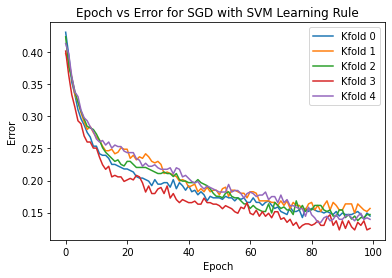

In [ ]:
ep=list(range(100))
plt.plot(ep,error_perceptron00)
plt.plot(ep,error_perceptron01)
plt.plot(ep,error_perceptron02)
plt.plot(ep,error_perceptron03)
plt.plot(ep,error_perceptron04)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend(['Kfold 0', 'Kfold 1', 'Kfold 2', 'Kfold 3', 'Kfold 4'])
plt.title("Epoch vs Error for SGD with SVM Learning Rule")
plt.show()

Text(0.5, 1.0, 'Accuracy in each fold')

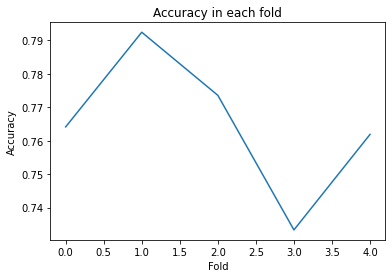

In [ ]:
list_kfold= [accuracy00, accuracy01, accuracy02, accuracy03, accuracy04]
plt.plot(list(range(5)), list_kfold)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy in each fold')

Batch with SVM Learning Rule

In [ ]:
# Batch with SVM learning rule fitting

weights00, error_perceptron00, bias00 = perceptron_fit_batch_svm(X_train0,y_train0,0.001,100)
weights01, error_perceptron01, bias01 = perceptron_fit_batch_svm(X_train1,y_train1,0.001,100)
weights02, error_perceptron02, bias02 = perceptron_fit_batch_svm(X_train2,y_train2,0.001,100)
weights03, error_perceptron03, bias03 = perceptron_fit_batch_svm(X_train3,y_train3,0.001,100)
weights04, error_perceptron04, bias04 = perceptron_fit_batch_svm(X_train4,y_train4,0.001,100)

In [ ]:
# Batch with SVM prediction
y_predict00,accuracy00=perceptron_predict(X_test0, y_test0, weights00, bias00) #X,y_true,weight
y_predict01,accuracy01=perceptron_predict(X_test1, y_test1, weights01, bias01) #X,y_true,weight
y_predict02,accuracy02=perceptron_predict(X_test2, y_test2, weights02, bias02) #X,y_true,weight
y_predict03,accuracy03=perceptron_predict(X_test3, y_test3, weights03, bias03) #X,y_true,weight
y_predict04,accuracy04=perceptron_predict(X_test4, y_test4, weights04, bias04) #X,y_true,weight
print("Model accuracy Kfold 0: ", accuracy00)
print("Model accuracy Kfold 1: ", accuracy01)
print("Model accuracy Kfold 2: ", accuracy02)
print("Model accuracy Kfold 3: ", accuracy03)
print("Model accuracy Kfold 4: ", accuracy04)

Model accuracy Kfold 0:  0.7641509433962265
Model accuracy Kfold 1:  0.7924528301886793
Model accuracy Kfold 2:  0.7547169811320755
Model accuracy Kfold 3:  0.7523809523809524
Model accuracy Kfold 4:  0.7619047619047619


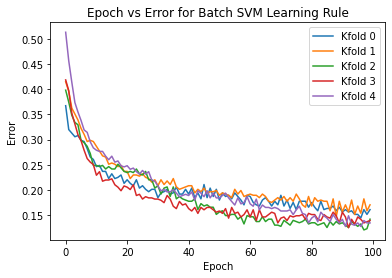

In [ ]:
ep=list(range(100))
plt.plot(ep,error_perceptron00)
plt.plot(ep,error_perceptron01)
plt.plot(ep,error_perceptron02)
plt.plot(ep,error_perceptron03)
plt.plot(ep,error_perceptron04)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend(['Kfold 0', 'Kfold 1', 'Kfold 2', 'Kfold 3', 'Kfold 4'])
plt.title("Epoch vs Error for Batch SVM Learning Rule")
plt.show()

Text(0.5, 1.0, 'Accuracy in each fold')

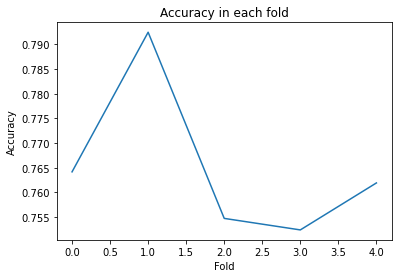

In [ ]:
list_kfold= [accuracy00, accuracy01, accuracy02, accuracy03, accuracy04]
plt.plot(list(range(5)), list_kfold)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy in each fold')

Minibatch SVM Learning Rule

In [ ]:
# Mini Batch with SVM learning rule fitting

weights00, error_perceptron00, bias00 = perceptron_fit_minibatch_svm(X_train0,y_train0,0.001,100, 100)
weights01, error_perceptron01, bias01 = perceptron_fit_minibatch_svm(X_train1,y_train1,0.001,100, 100)
weights02, error_perceptron02, bias02 = perceptron_fit_minibatch_svm(X_train2,y_train2,0.001,100, 100)
weights03, error_perceptron03, bias03 = perceptron_fit_minibatch_svm(X_train3,y_train3,0.001,100, 100)
weights04, error_perceptron04, bias04 = perceptron_fit_minibatch_svm(X_train4,y_train4,0.001,100, 100)

In [ ]:
# Mini Batch with SVM prediction
y_predict00,accuracy00=perceptron_predict(X_test0, y_test0, weights00, bias00) #X,y_true,weight
y_predict01,accuracy01=perceptron_predict(X_test1, y_test1, weights01, bias01) #X,y_true,weight
y_predict02,accuracy02=perceptron_predict(X_test2, y_test2, weights02, bias02) #X,y_true,weight
y_predict03,accuracy03=perceptron_predict(X_test3, y_test3, weights03, bias03) #X,y_true,weight
y_predict04,accuracy04=perceptron_predict(X_test4, y_test4, weights04, bias04) #X,y_true,weight
print("Model accuracy Kfold 0: ", accuracy00)
print("Model accuracy Kfold 1: ", accuracy01)
print("Model accuracy Kfold 2: ", accuracy02)
print("Model accuracy Kfold 3: ", accuracy03)
print("Model accuracy Kfold 4: ", accuracy04)

Model accuracy Kfold 0:  0.6132075471698113
Model accuracy Kfold 1:  0.6698113207547169
Model accuracy Kfold 2:  0.6415094339622641
Model accuracy Kfold 3:  0.7047619047619048
Model accuracy Kfold 4:  0.6476190476190476


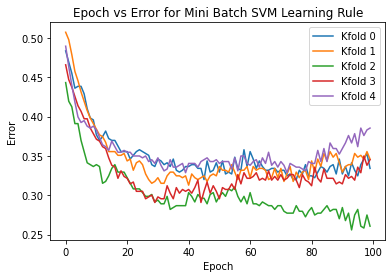

In [ ]:
ep=list(range(100))
plt.plot(ep,error_perceptron00)
plt.plot(ep,error_perceptron01)
plt.plot(ep,error_perceptron02)
plt.plot(ep,error_perceptron03)
plt.plot(ep,error_perceptron04)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend(['Kfold 0', 'Kfold 1', 'Kfold 2', 'Kfold 3', 'Kfold 4'])
plt.title("Epoch vs Error for Mini Batch SVM Learning Rule")
plt.show()

Text(0.5, 1.0, 'Accuracy in each fold')

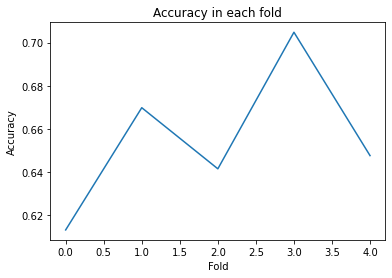

In [ ]:
list_kfold= [accuracy00, accuracy01, accuracy02, accuracy03, accuracy04]
plt.plot(list(range(5)), list_kfold)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy in each fold')